In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
pip install -U matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.7.1-cp310-cp310-win_amd64.whl (7.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.3
    Uninstalling matplotlib-3.6.3:
      Successfully uninstalled matplotlib-3.6.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.1.2 requires matplotlib<3.7,>=3.2, but you have matplotlib 3.7.1 which is incompatible.


In [3]:
!pip install plotly-express

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install pandas-profiling

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.6.3-cp310-cp310-win_amd64.whl (7.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [5]:
#import the required libraries
import csv
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt  
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
import numpy as np



In [6]:
#importing and reading the census19.csv file 
cd = pd.read_csv('census19.csv')
cd.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Holly Road,Rita,Hanson,45.0,Head,Divorced,Female,Purchasing manager,None,None
1,2,Holly Road,Dorothy,Russell,29.0,Head,Single,Female,Retail merchandiser,None,None
2,2,Holly Road,Valerie,Hussain,18.0,None,Single,Female,Student,None,NaN
3,2,Holly Road,Julie,Buckley,55.0,None,Single,Female,Hospital pharmacist,None,Methodist
4,3,Holly Road,Martin,Kemp,70.0,Head,Married,Male,"Retired Buyer, industrial",None,Methodist


In [7]:
from pandas_profiling import ProfileReport
prof = ProfileReport(cd)
prof.to_file(output_file='output.html')

C:\Users\729278\AppData\Local\Temp\ipykernel_12128\1966236557.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\729278\AppData\Roaming\Python\Python310\site-packages\pandas_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Data Cleaning

In [8]:
#Checking for Information on the Dataframe
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7761 entries, 0 to 7760
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House Number                   7761 non-null   int64  
 1   Street                         7761 non-null   object 
 2   First Name                     7761 non-null   object 
 3   Surname                        7761 non-null   object 
 4   Age                            7761 non-null   float64
 5   Relationship to Head of House  7761 non-null   object 
 6   Marital Status                 6036 non-null   object 
 7   Gender                         7761 non-null   object 
 8   Occupation                     7761 non-null   object 
 9   Infirmity                      7761 non-null   object 
 10  Religion                       5983 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 667.1+ KB


In [9]:
#Checking for the sum of null values in each column for the census19 dataset
cd.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1725
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         1778
dtype: int64

### Cleaning Religion

#### Checking for Blank Values in Religion Column

In [10]:
#Checking for the sum of blank values in the religion column
cd['Religion'].eq(' ').sum()

2

In [11]:
#Assigning to a Variable 
Religion = cd['Religion'].eq(' ')

In [12]:
#Getting the location of the blank entries
cd.loc[Religion, 'Religion'].eq(' ')

4305    True
5126    True
Name: Religion, dtype: bool

In [13]:
cd.loc[4302:5130]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4302,3,Hall Crescent,Jade,Jones,21.0,Lodger,Divorced,Female,University Student,None,Undecided
4303,4,Hall Crescent,Dorothy,Mitchell,36.0,Head,Divorced,Female,Sales executive,None,Christian
4304,4,Hall Crescent,Josh,Harris-Mitchell,14.0,Son,NaN,Male,Student,None,NaN
4305,5,Hall Crescent,Natalie,Smith,37.0,Head,Single,Female,"Engineer, maintenance",None,
4306,5,Hall Crescent,Hazel,Hill,46.0,Lodger,Single,Female,Patent attorney,None,Methodist
...,...,...,...,...,...,...,...,...,...,...,...
5126,5,Regent Road,Ashley,May,18.0,Head,Married,Male,Student,None,
5127,5,Regent Road,Patricia,May,19.0,Wife,Married,Female,University Student,None,None
5128,6,Regent Road,Joel,Lambert,44.0,Head,Single,Male,Commercial/residential surveyor,None,Methodist
5129,7,Regent Road,Anne,Lawrence,49.0,Head,Divorced,Female,Unemployed,None,Christian


### Cleaning Marital Status

#### Checking for Blank Values in Marital Status Column

In [14]:
#Checking for the sum of blank values in the Marital Status column
cd['Marital Status'].eq(' ').sum()

1

In [15]:
#Checking for the sum of NaN values in the Marital status column
cd['Marital Status'].isna().sum()

1725

In [16]:
#Checking for unique values in the Marital status column
cd['Marital Status'].unique()

array(['Divorced', 'Single', 'Married', nan, 'Widowed', ' '], dtype=object)

In [17]:
#Assigning to a variable
ms = cd['Marital Status'].eq(' ')

In [18]:
#Getting the location of the blank entries
cd.loc[ms, 'Marital Status'].eq(' ')

2639    True
Name: Marital Status, dtype: bool

In [19]:
cd.loc[2637:2642]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2637,16,Henge Crescent,Paige,Robinson,67.0,Head,Married,Female,"Engineer, electrical",None,Christian
2638,16,Henge Crescent,Leigh,Robinson,71.0,Husband,Married,Male,"Retired Administrator, local government",None,Christian
2639,17,Henge Crescent,Jake,Hawkins,66.0,Head,,Male,Clinical biochemist,None,Methodist
2640,18,Henge Crescent,Natasha,Armstrong,53.0,Head,Single,Female,Tax adviser,None,Christian
2641,18,Henge Crescent,Jeffrey,Dobson,1.0,Grandson,NaN,Male,Child,None,NaN
2642,19,Henge Crescent,Graham,Wilson,77.0,Head,Married,Male,Retired Futures trader,None,Christian


### Cleaning Occupatiom

#### Checking for Blank Values in Occupation Column

In [20]:
cd['Occupation'].eq(' ').sum()

1

In [21]:
cd['Occupation'].isna().sum()

0

In [22]:
cd['Occupation'].unique()

array(['Purchasing manager', 'Retail merchandiser', 'Student', ...,
       'Retired Microbiologist', 'Retired Legal executive',
       'Retired Software engineer'], dtype=object)

### Cleaning Infirmity

#### Checking for Blank Values in Infirmity Column

In [23]:
Infirmity = cd['Infirmity'].eq(' ').sum()
Infirmity

8

In [24]:
cd['Infirmity'].unique()

array(['None', 'Unknown Infection', ' ', 'Mental Disability', 'Deaf',
       'Blind', 'Physical Disability', 'Disabled'], dtype=object)

### Cleaning First Name

#### Checking for Blank Values in First Name Column

In [25]:
first_name = cd['First Name'].eq(' ')

In [26]:
cd.loc[first_name, 'First Name'].eq(' ')

323    True
Name: First Name, dtype: bool

In [27]:
cd.loc[319:326]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
319,40,Orchard Avenue,Mathew,Sykes,23.0,Lodger,Single,Male,Animator,None,None
320,40,Orchard Avenue,Conor,Taylor,50.0,Lodger,Single,Male,Purchasing manager,None,Christian
321,41,Orchard Avenue,Jade,Bevan,43.0,Head,Single,Female,Barrister,None,Muslim
322,41,Orchard Avenue,Eileen,Bevan,14.0,Daughter,NaN,Female,Student,None,NaN
323,41,Orchard Avenue,,Bevan,12.0,Daughter,NaN,Female,Student,None,NaN
324,42,Orchard Avenue,Ryan,Matthews,56.0,Head,Married,Male,Training and development officer,None,Christian
325,42,Orchard Avenue,Ann,Matthews,58.0,Wife,Married,Female,Police officer,None,Christian
326,42,Orchard Avenue,Carly,Matthews,36.0,Daughter,Single,Female,Accounting technician,None,None


### Cleaning Gender

#### Checking for Blank Values in Gender Column

In [28]:
cd['Gender'].eq(' ').sum()

0

In [29]:
cd['Gender'].isna().sum()

0

In [30]:
cd['Gender'].unique()

array(['Female', 'Male'], dtype=object)

### Cleaning Age

#### Checking for Blank Values in Age Column

In [31]:
cd['Age'].eq(' ').sum()

0

In [32]:
cd['Age'].unique()

array([ 45.        ,  29.        ,  18.        ,  55.        ,
        70.        ,  68.        ,  35.        ,  34.        ,
        44.        ,  10.        ,   9.        ,  58.        ,
        54.        ,  57.        ,  17.        ,  51.        ,
        56.        ,  15.        ,  52.        ,  12.        ,
         5.        ,  48.        ,  28.        ,  24.        ,
        20.        ,  59.        ,  26.        ,  50.        ,
        43.        ,  75.        ,  31.        ,   2.        ,
         0.        ,  53.        ,  32.        ,  30.        ,
        62.        ,  64.        ,  47.        ,  49.        ,
        16.        ,  22.        ,  13.        ,  46.        ,
        11.        ,  27.        ,  19.        ,  42.        ,
        63.        ,  78.        ,  60.        ,  23.        ,
        40.        ,   8.        ,   6.        ,  21.        ,
        39.        ,  36.        ,   7.        ,  25.        ,
         4.        ,   1.        ,  38.        ,  65.  

In [33]:
#Convert the Age column to int from float
cd['Age'] = cd['Age'].astype('int')

In [34]:
#Checking for Unique Values in the Age Column
cd['Age'].unique()

array([ 45,  29,  18,  55,  70,  68,  35,  34,  44,  10,   9,  58,  54,
        57,  17,  51,  56,  15,  52,  12,   5,  48,  28,  24,  20,  59,
        26,  50,  43,  75,  31,   2,   0,  53,  32,  30,  62,  64,  47,
        49,  16,  22,  13,  46,  11,  27,  19,  42,  63,  78,  60,  23,
        40,   8,   6,  21,  39,  36,   7,  25,   4,   1,  38,  65,  88,
        79,  77,  41,  37,  33,  14,  66,  72,  74,   3,  61,  84,  67,
        81,  76,  86,  69,  92,  96,  73,  71,  87,  94,  83,  85,  80,
        82,  90,  91,  98, 103, 104,  89,  99,  97,  95, 102, 105,  93,
       101])

### Cleaning Relationship to Head of House

#### Checking for Blank Values in Relationship to Head of House Column

In [35]:
cd['Relationship to Head of House'].unique()

array(['Head', 'None', 'Wife', 'Son', 'Daughter', 'Husband', 'Partner',
       'Step-Daughter', 'Step-Son', 'Lodger', 'Granddaughter', 'Visitor',
       'Grandson', 'Cousin', 'Adopted Daughter', 'Sibling', 'Adopted Son',
       'Neice', 'Adopted Granddaughter', 'Nephew'], dtype=object)

In [36]:
cd['Relationship to Head of House'].eq(' ').sum()

0

In [37]:
cd['Relationship to Head of House'].isna().sum()

0

### Marital status

#### Fixing the Marital Status Column

In [38]:
marital_status = cd[cd['Marital Status'].isnull() == True]
marital_status

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
10,4,Holly Road,Christian,Wilson,10,Son,NaN,Male,Student,None,NaN
11,4,Holly Road,Albert,Hudson-Wilson,9,Son,NaN,Male,Student,None,NaN
15,6,Holly Road,Natasha,Farrell,17,Daughter,NaN,Female,Student,None,NaN
19,7,Holly Road,Tracey,Ferguson,15,Daughter,NaN,Female,Student,None,NaN
22,8,Holly Road,Roger,Harper,15,Son,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7756,1,Lees Longhouse,Jake,Hicks,10,Son,NaN,Male,Student,None,NaN
7757,1,Lees Longhouse,Neil,Richardson-Hicks,9,Son,NaN,Male,Student,None,NaN
7758,1,Lees Longhouse,Chelsea,Richardson-Hicks,5,Daughter,NaN,Female,Student,None,NaN
7759,1,Lees Longhouse,Brian,Richardson-Hicks,3,Son,NaN,Male,Child,None,NaN


In [39]:
#Getting the total number of null(NaN) Values in the Marital Status column and are < 18 years
cd[(cd["Age"] < 18) & (cd["Marital Status"].isna() == True)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
10,4,Holly Road,Christian,Wilson,10,Son,NaN,Male,Student,None,NaN
11,4,Holly Road,Albert,Hudson-Wilson,9,Son,NaN,Male,Student,None,NaN
15,6,Holly Road,Natasha,Farrell,17,Daughter,NaN,Female,Student,None,NaN
19,7,Holly Road,Tracey,Ferguson,15,Daughter,NaN,Female,Student,None,NaN
22,8,Holly Road,Roger,Harper,15,Son,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7756,1,Lees Longhouse,Jake,Hicks,10,Son,NaN,Male,Student,None,NaN
7757,1,Lees Longhouse,Neil,Richardson-Hicks,9,Son,NaN,Male,Student,None,NaN
7758,1,Lees Longhouse,Chelsea,Richardson-Hicks,5,Daughter,NaN,Female,Student,None,NaN
7759,1,Lees Longhouse,Brian,Richardson-Hicks,3,Son,NaN,Male,Child,None,NaN


In [40]:
#writing a function to fill NaN values in Marital Status for Individuals < 18years

def fill_marital_status(cd):
    cd['Marital Status'] = cd.apply(lambda row: 'NA' if row['Age'] < 18 and pd.isnull(row['Marital Status']) else row['Marital Status'], axis=1)
    return cd

In [41]:
cd = fill_marital_status(cd)

In [42]:
#Checking if there are still null values in Marital Status
cd[cd["Marital Status"].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [43]:
#Replacing the empty string with Single as Age is 66 without no records of wife or child and he lives alone
cd["Marital Status"] = cd["Marital Status"].replace([' '], 'Single', regex=True)

In [44]:
cd["Marital Status"].unique()

array(['Divorced', 'Single', 'Married', 'NA', 'Widowed'], dtype=object)

In [45]:
cd.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                      0
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         1778
dtype: int64

In [46]:
mar_status = cd['Marital Status'].describe()
print(mar_status)

count       7761
unique         5
top       Single
freq        2727
Name: Marital Status, dtype: object


### Religion

#### Fixing the Religion Column

In [47]:
#Checking for null values in Religion
cd[cd["Religion"].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,2,Holly Road,Valerie,Hussain,18,None,Single,Female,Student,None,NaN
10,4,Holly Road,Christian,Wilson,10,Son,NA,Male,Student,None,NaN
11,4,Holly Road,Albert,Hudson-Wilson,9,Son,NA,Male,Student,None,NaN
15,6,Holly Road,Natasha,Farrell,17,Daughter,NA,Female,Student,None,NaN
19,7,Holly Road,Tracey,Ferguson,15,Daughter,NA,Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7756,1,Lees Longhouse,Jake,Hicks,10,Son,NA,Male,Student,None,NaN
7757,1,Lees Longhouse,Neil,Richardson-Hicks,9,Son,NA,Male,Student,None,NaN
7758,1,Lees Longhouse,Chelsea,Richardson-Hicks,5,Daughter,NA,Female,Student,None,NaN
7759,1,Lees Longhouse,Brian,Richardson-Hicks,3,Son,NA,Male,Child,None,NaN


In [48]:
cd["Religion"].unique()

array(['None', nan, 'Methodist', 'Catholic', 'Christian', 'Muslim',
       'Sikh', 'Buddist', 'Jewish', 'Undecided', 'Hindu', 'Bahai', ' ',
       'Jedi', 'Nope'], dtype=object)

In [49]:
#Getting the total number of null(NaN) Values in the Religion column and are < 18 years
cd[(cd["Age"] < 18) & (cd["Religion"].isna() == True)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
10,4,Holly Road,Christian,Wilson,10,Son,NA,Male,Student,None,NaN
11,4,Holly Road,Albert,Hudson-Wilson,9,Son,NA,Male,Student,None,NaN
15,6,Holly Road,Natasha,Farrell,17,Daughter,NA,Female,Student,None,NaN
19,7,Holly Road,Tracey,Ferguson,15,Daughter,NA,Female,Student,None,NaN
22,8,Holly Road,Roger,Harper,15,Son,NA,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7756,1,Lees Longhouse,Jake,Hicks,10,Son,NA,Male,Student,None,NaN
7757,1,Lees Longhouse,Neil,Richardson-Hicks,9,Son,NA,Male,Student,None,NaN
7758,1,Lees Longhouse,Chelsea,Richardson-Hicks,5,Daughter,NA,Female,Student,None,NaN
7759,1,Lees Longhouse,Brian,Richardson-Hicks,3,Son,NA,Male,Child,None,NaN


In [50]:
#Getting the total number of None Values in the Religion column and are < 18 years
cd[(cd["Age"] < 18) & (cd["Religion"].eq('None'))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [51]:
#Getting the total number of None Values in the Religion column and are < 18 years
cd[(cd["Age"] < 18) & (cd["Religion"] == None)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [52]:
#Getting the total number of Nope Values in the Religion column and are < 18 years
cd[(cd["Age"] < 18) & (cd["Religion"].eq('Nope'))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


#### Created a function to Map House Number with Street in order to fill NaN Values of Religion for Individuals less than 18 with the religion of the Head of House

In [53]:
def fill_religion(cd):
    #Create a dictionary mapping (House_Number, Street) tuples to Religion values of Head of House
    address_religion = dict(cd.loc[cd['Age'] >= 18].groupby(['House Number', 'Street'])['Religion'].first())
    #Apply the dictionary to fill NaN values in the Religion column for individuals less than 18 years old
    cd['Religion'] = cd.apply(lambda row: address_religion.get((row['House Number'], row['Street']), row['Religion']) if row['Age'] < 18 and pd.isnull(row['Religion']) else row['Religion'], axis=1)
    
    return cd

In [54]:
cd = fill_religion(cd)

#### Created a function to Map House Number with Street in order to fill None Values of Religion for Individuals less than 18 with the religion of the Head of House

In [55]:
def fill_none_religion(cd):
    #Create a dictionary mapping (House_Number, Street) tuples to Religion values of Head of House
    none_religion = dict(cd.loc[cd['Age'] >= 18].groupby(['House Number', 'Street'])['Religion'].first())
    #Apply the dictionary to fill None values in the Religion column for individuals less than 18 years old
    cd['Religion'] = cd.apply(lambda row: none_religion.get((row['House Number'], row['Street']), row['Religion']) if row['Age'] < 18 and row['Religion'] is None else row['Religion'], axis=1)
    
    return cd

In [56]:
cd = fill_none_religion(cd)

In [57]:
#Checking the dataframe for where Age < 18 and Religion equals None
cd[(cd["Age"] < 18) & (cd["Religion"].eq('None'))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
22,8,Holly Road,Roger,Harper,15,Son,NA,Male,Student,None,None
23,8,Holly Road,Stewart,Harper,12,Son,NA,Male,Student,None,None
24,8,Holly Road,Melissa,Harper,9,Daughter,NA,Female,Student,None,None
25,8,Holly Road,Steven,Harper,5,Son,NA,Male,Student,None,None
59,16,Holly Road,Jane,Day,13,Daughter,NA,Female,Student,None,None
...,...,...,...,...,...,...,...,...,...,...,...
7661,9,Jones Drive,Gordon,Parker,15,Son,NA,Male,Student,None,None
7662,9,Jones Drive,Jake,Parker,15,Son,NA,Male,Student,None,None
7705,1,Roman Stronghold,Toby,Jones-Smith,13,Son,NA,Male,Student,None,None
7706,1,Roman Stronghold,Adrian,Jones-Smith,5,Son,NA,Male,Student,None,None


In [58]:
#Checking for null entries in the Religion Column
cd[cd["Religion"].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,2,Holly Road,Valerie,Hussain,18,None,Single,Female,Student,None,NaN
478,2,Barber River,Aimee,Gibbs,18,Lodger,Divorced,Female,Student,None,NaN
554,33,Barber River,Bethan,Edwards,18,None,Single,Female,Student,None,NaN
688,16,Elliott Drive,Andrea,Noble,18,Head,Single,Female,Student,None,NaN
777,6,Mermaid Avenue,Sarah,Smith,17,Head,Married,Female,Student,None,None
778,6,Mermaid Avenue,Eric,Smith,20,Husband,Married,Male,University Student,None,NaN
779,6,Mermaid Avenue,Irene,Smith,0,Daughter,NA,Female,Child,None,None
965,16,Halfcrown Heights,Antony,Connolly,18,Lodger,Single,Male,Student,None,NaN
1322,9,King Lane,Gordon,Arnold,18,None,Single,Male,Student,None,NaN
1504,26,March Curve,Joanna,Green,18,Head,Married,Female,Student,None,NaN


In [59]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7761 entries, 0 to 7760
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7761 non-null   int64 
 1   Street                         7761 non-null   object
 2   First Name                     7761 non-null   object
 3   Surname                        7761 non-null   object
 4   Age                            7761 non-null   int32 
 5   Relationship to Head of House  7761 non-null   object
 6   Marital Status                 7761 non-null   object
 7   Gender                         7761 non-null   object
 8   Occupation                     7761 non-null   object
 9   Infirmity                      7761 non-null   object
 10  Religion                       7708 non-null   object
dtypes: int32(1), int64(1), object(9)
memory usage: 636.8+ KB


In [60]:
#Checking for Unique Values in Religion Column
cd["Religion"].unique()

array(['None', nan, 'Methodist', 'Catholic', 'Christian', 'Muslim',
       'Sikh', None, 'Buddist', 'Jewish', 'Undecided', 'Hindu', 'Bahai',
       ' ', 'Jedi', 'Nope'], dtype=object)

In [61]:
#Checking for Value Counts for the Unique Values in Religion Column
cd["Religion"].value_counts()

None         3240
Christian    2267
Catholic     1267
Methodist     677
Muslim        153
Sikh           52
Jewish         41
Jedi            3
Undecided       2
                2
Buddist         1
Hindu           1
Bahai           1
Nope            1
Name: Religion, dtype: int64

In [62]:
#Replacing the empty string with No Religion as #5120 Ashley May Wife's religion is None and #4305 is single woman
cd["Religion"] = cd["Religion"].replace([' '], 'No Religion', regex=True)

In [63]:
#Replacing Jedi with No Religion as Jedi is a fictional name. This was a lie
cd["Religion"] = cd["Religion"].replace(['Jedi'], 'No Religion', regex=True)

In [64]:
#Replacing Undecided with None 
cd["Religion"] = cd["Religion"].replace(['Undecided'], None, regex=True)

In [65]:
#Checking for the sum of NaN Values in Religion Column
cd["Religion"].isna().sum()

55

In [66]:
#Replacing NaN Values for Religion of individuals greater than 18 with No Religion 
cd["Religion"] = cd["Religion"].fillna('No Religion')

In [67]:
#Replacing Nope Value for Religion of individual with No Religion as this was considered an error
cd["Religion"] = cd["Religion"].replace(['Nope'], 'No Religion', regex=True)

In [68]:
#Replacing None Value for Religion of individual with No Religion as this was considered an error
cd["Religion"] = cd["Religion"].replace(['None'], 'No Religion', regex=True)

In [69]:
#Checking for Unique Values in the Religion Column
cd["Religion"].unique()

array(['No Religion', 'Methodist', 'Catholic', 'Christian', 'Muslim',
       'Sikh', 'Buddist', 'Jewish', 'Hindu', 'Bahai'], dtype=object)

In [70]:
#Checking for sum of NaN Values in the dataframe
cd.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

### First Name

#### Cleaning the First Name Column

In [71]:
 #323 has an empty entry, this is for a daughter age 12, I'd assume the Mother named her after Her
cd["First Name"] = cd["First Name"].replace([' '], 'Jade', regex=True)

In [72]:
#Confirming that the empty cell has been replaced with name Jade
cd.loc[320:325]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
320,40,Orchard Avenue,Conor,Taylor,50,Lodger,Single,Male,Purchasing manager,None,Christian
321,41,Orchard Avenue,Jade,Bevan,43,Head,Single,Female,Barrister,None,Muslim
322,41,Orchard Avenue,Eileen,Bevan,14,Daughter,NA,Female,Student,None,Muslim
323,41,Orchard Avenue,Jade,Bevan,12,Daughter,NA,Female,Student,None,Muslim
324,42,Orchard Avenue,Ryan,Matthews,56,Head,Married,Male,Training and development officer,None,Christian
325,42,Orchard Avenue,Ann,Matthews,58,Wife,Married,Female,Police officer,None,Christian


### Occupation

#### Cleaning the Occupation Column

In [73]:
cd

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Holly Road,Rita,Hanson,45,Head,Divorced,Female,Purchasing manager,None,No Religion
1,2,Holly Road,Dorothy,Russell,29,Head,Single,Female,Retail merchandiser,None,No Religion
2,2,Holly Road,Valerie,Hussain,18,None,Single,Female,Student,None,No Religion
3,2,Holly Road,Julie,Buckley,55,None,Single,Female,Hospital pharmacist,None,Methodist
4,3,Holly Road,Martin,Kemp,70,Head,Married,Male,"Retired Buyer, industrial",None,Methodist
...,...,...,...,...,...,...,...,...,...,...,...
7756,1,Lees Longhouse,Jake,Hicks,10,Son,NA,Male,Student,None,Catholic
7757,1,Lees Longhouse,Neil,Richardson-Hicks,9,Son,NA,Male,Student,None,Catholic
7758,1,Lees Longhouse,Chelsea,Richardson-Hicks,5,Daughter,NA,Female,Student,None,Catholic
7759,1,Lees Longhouse,Brian,Richardson-Hicks,3,Son,NA,Male,Child,None,Catholic


In [74]:
#Confirming that the Occupation has been replaced
cd.loc[380:390]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
380,13,Gibson Crescent,Colin,Foster,17,Son,NA,Male,Student,None,Christian
381,14,Gibson Crescent,Sheila,Jones,66,Head,Married,Female,Illustrator,None,Catholic
382,14,Gibson Crescent,Arthur,Jones,67,Husband,Married,Male,Commercial art gallery manager,None,No Religion
383,14,Gibson Crescent,Ross,Lord,16,Grandson,NA,Male,Student,None,Catholic
384,15,Gibson Crescent,Jane,Little,49,Head,Single,Female,Technical sales engineer,None,Christian
385,15,Gibson Crescent,Reece,Greenwood,52,Partner,Single,Male,Field trials officer,None,Christian
386,15,Gibson Crescent,Marcus,Little,9,Son,NA,Male,,None,Christian
387,15,Gibson Crescent,Teresa,Little,8,Daughter,NA,Female,Student,None,Christian
388,15,Gibson Crescent,Bryan,Little,7,Son,NA,Male,Student,None,Christian
389,16,Gibson Crescent,June,Whitehead,47,Head,Married,Female,Unemployed,None,No Religion


In [75]:
#386, Son with age 9, it's only logical occupation would be student as UK Law states that young children must be in school before they are 18
cd.at[386, "Occupation"] = "Student"

In [76]:
#Confirming that the Occupation has been replaced
cd.loc[380:390]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
380,13,Gibson Crescent,Colin,Foster,17,Son,NA,Male,Student,None,Christian
381,14,Gibson Crescent,Sheila,Jones,66,Head,Married,Female,Illustrator,None,Catholic
382,14,Gibson Crescent,Arthur,Jones,67,Husband,Married,Male,Commercial art gallery manager,None,No Religion
383,14,Gibson Crescent,Ross,Lord,16,Grandson,NA,Male,Student,None,Catholic
384,15,Gibson Crescent,Jane,Little,49,Head,Single,Female,Technical sales engineer,None,Christian
385,15,Gibson Crescent,Reece,Greenwood,52,Partner,Single,Male,Field trials officer,None,Christian
386,15,Gibson Crescent,Marcus,Little,9,Son,NA,Male,Student,None,Christian
387,15,Gibson Crescent,Teresa,Little,8,Daughter,NA,Female,Student,None,Christian
388,15,Gibson Crescent,Bryan,Little,7,Son,NA,Male,Student,None,Christian
389,16,Gibson Crescent,June,Whitehead,47,Head,Married,Female,Unemployed,None,No Religion


### Classification of Occupation

Creating a new column called Occupation Identifier to House the Classification of each Occupation

In [77]:
# Define a function to map each occupation to a category
def occupation_identifier(Occupation):
    #Occupation = Occupation.lower().strip()
    if any(i in Occupation.lower() for i in ['university','lecturer','phd']):
        return "University Student" 
    elif "child" in Occupation.lower():
        return "Child"
    elif "student" in Occupation.lower():
        return "Student"
    elif "unemployed" in Occupation.lower():
        return "Unemployed"
    elif "retired" in Occupation.lower():
        return "Retired"
    else:
        return "Employed"

# Apply the function to the "Occupation" column and store the result in a new column called "Occupation Category"
cd["Occupation Identifier"] = cd["Occupation"].apply(occupation_identifier)


In [78]:
#Checking for Unique Values in the Occupation Identifier Column
cd['Occupation Identifier'].unique()

array(['Employed', 'Student', 'Retired', 'Unemployed',
       'University Student', 'Child'], dtype=object)

In [79]:
#checking where Occupation Identifier equals Student
cd[(cd['Occupation Identifier']=='Student')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Identifier
2,2,Holly Road,Valerie,Hussain,18,None,Single,Female,Student,None,No Religion,Student
10,4,Holly Road,Christian,Wilson,10,Son,NA,Male,Student,None,Catholic,Student
11,4,Holly Road,Albert,Hudson-Wilson,9,Son,NA,Male,Student,None,Catholic,Student
15,6,Holly Road,Natasha,Farrell,17,Daughter,NA,Female,Student,None,Christian,Student
18,7,Holly Road,Marilyn,Lowe,18,Daughter,Divorced,Female,Student,None,Methodist,Student
...,...,...,...,...,...,...,...,...,...,...,...,...
7751,1,Oxford Spire,Josephine,Stewart,6,Daughter,NA,Female,Student,None,Christian,Student
7755,1,Lees Longhouse,Stanley,Hicks,11,Son,NA,Male,Student,None,Catholic,Student
7756,1,Lees Longhouse,Jake,Hicks,10,Son,NA,Male,Student,None,Catholic,Student
7757,1,Lees Longhouse,Neil,Richardson-Hicks,9,Son,NA,Male,Student,None,Catholic,Student


In [80]:
#checking where Occupation Identifier equals Student Unemployed and Occupation equals Retired
cd[(cd['Occupation Identifier'] == 'Unemployed') & (cd['Occupation'] == 'Retired')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Identifier


In [81]:
#Query to get the first 20 entries in the dataframe
cd.head(20)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Identifier
0,1,Holly Road,Rita,Hanson,45,Head,Divorced,Female,Purchasing manager,None,No Religion,Employed
1,2,Holly Road,Dorothy,Russell,29,Head,Single,Female,Retail merchandiser,None,No Religion,Employed
2,2,Holly Road,Valerie,Hussain,18,None,Single,Female,Student,None,No Religion,Student
3,2,Holly Road,Julie,Buckley,55,None,Single,Female,Hospital pharmacist,None,Methodist,Employed
4,3,Holly Road,Martin,Kemp,70,Head,Married,Male,"Retired Buyer, industrial",None,Methodist,Retired
5,3,Holly Road,Deborah,Kemp,68,Wife,Married,Female,Retired Armed forces logistics/support/adminis...,None,Methodist,Retired
6,3,Holly Road,Christian,Morris-Kemp,35,Son,Divorced,Male,Leisure centre manager,None,Methodist,Employed
7,3,Holly Road,Lauren,Morris-Kemp,34,Daughter,Single,Female,Therapeutic radiographer,None,Methodist,Employed
8,4,Holly Road,Valerie,Wilson,44,Head,Married,Female,Animator,None,Catholic,Employed
9,4,Holly Road,Daniel,Wilson,45,Husband,Married,Male,"Engineer, land",None,Catholic,Employed


### Infirmity

#### Fixing the Infirmity Column

In [82]:
#Checking for Unique Values in the Infirmity Column
cd["Infirmity"].unique()

array(['None', 'Unknown Infection', ' ', 'Mental Disability', 'Deaf',
       'Blind', 'Physical Disability', 'Disabled'], dtype=object)

In [83]:
#Checking for sum of NaN Values in the Infirmity Column
cd["Infirmity"].isna().sum()

0

In [84]:
#Replacing blank Values in the Infirmity Column with No Disability
cd["Infirmity"] = cd["Infirmity"].replace([' '], 'No Disability')

In [85]:
#Replacing None Values in the Infirmity Column with No Disability
cd["Infirmity"] = cd["Infirmity"].replace(['None'], 'No Disability')

In [86]:
#Checking for Unique Values in the Infirmity Column
cd["Infirmity"].unique()

array(['No Disability', 'Unknown Infection', 'Mental Disability', 'Deaf',
       'Blind', 'Physical Disability', 'Disabled'], dtype=object)

In [87]:
#Checking for Value Counts in the Infirmity Column
cd["Infirmity"].value_counts()

No Disability          7705
Unknown Infection        13
Mental Disability        13
Physical Disability      10
Deaf                      9
Blind                     8
Disabled                  3
Name: Infirmity, dtype: int64

In [88]:
#Fetching information about the Dataframe
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7761 entries, 0 to 7760
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7761 non-null   int64 
 1   Street                         7761 non-null   object
 2   First Name                     7761 non-null   object
 3   Surname                        7761 non-null   object
 4   Age                            7761 non-null   int32 
 5   Relationship to Head of House  7761 non-null   object
 6   Marital Status                 7761 non-null   object
 7   Gender                         7761 non-null   object
 8   Occupation                     7761 non-null   object
 9   Infirmity                      7761 non-null   object
 10  Religion                       7761 non-null   object
 11  Occupation Identifier          7761 non-null   object
dtypes: int32(1), int64(1), object(10)
memory usage: 697.4+ KB



#### Checking for Blank Values in Other Columns

In [89]:
#Calculating the sum of Blank Values in House Number Column
cd['House Number'].eq(' ').sum()

0

In [90]:
#Calculating the sum of Blank Values in Street Column
cd['Street'].eq(' ').sum()

0

In [91]:
#Calculating the sum of Blank Values in Surname Column
cd['Surname'].eq(' ').sum()

0

In [92]:
#Calculating the sum of Blank Values in Relationship to Head of House Column
cd['Relationship to Head of House'].eq(' ').sum()

0

### Plots

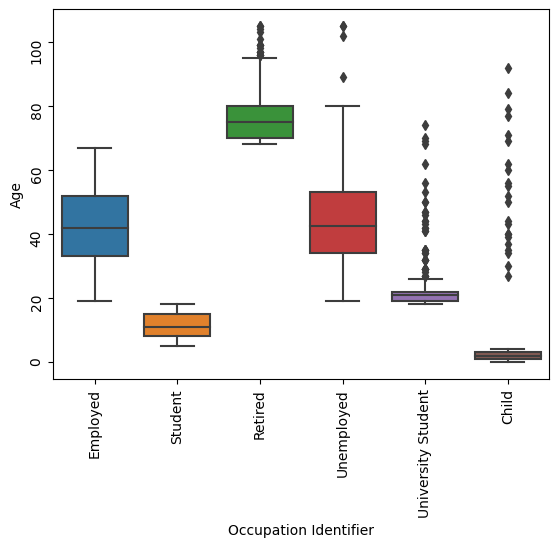

<Figure size 1000x500 with 0 Axes>

In [93]:
#Age against Occupation Plot
age_occupation = sns.boxplot(data=cd, x="Occupation Identifier", y="Age")
age_occupation.tick_params(labelrotation = 90, labelsize = 10)
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 1.5)
plt.tight_layout()

In [94]:
from matplotlib import patches as mpatches

In [95]:
#Function to get age range using Gender and Age
def get_age_range(cd, gender, start_age, end_age):
    '''Returns the number of persons of a specified
       gender within a specified age range.'''
    return cd[(cd['Gender'] == gender)& 
           (cd["Age"] >= start_age)& 
           (cd['Age'] <= end_age)].count()['Gender']

M:23
F:23


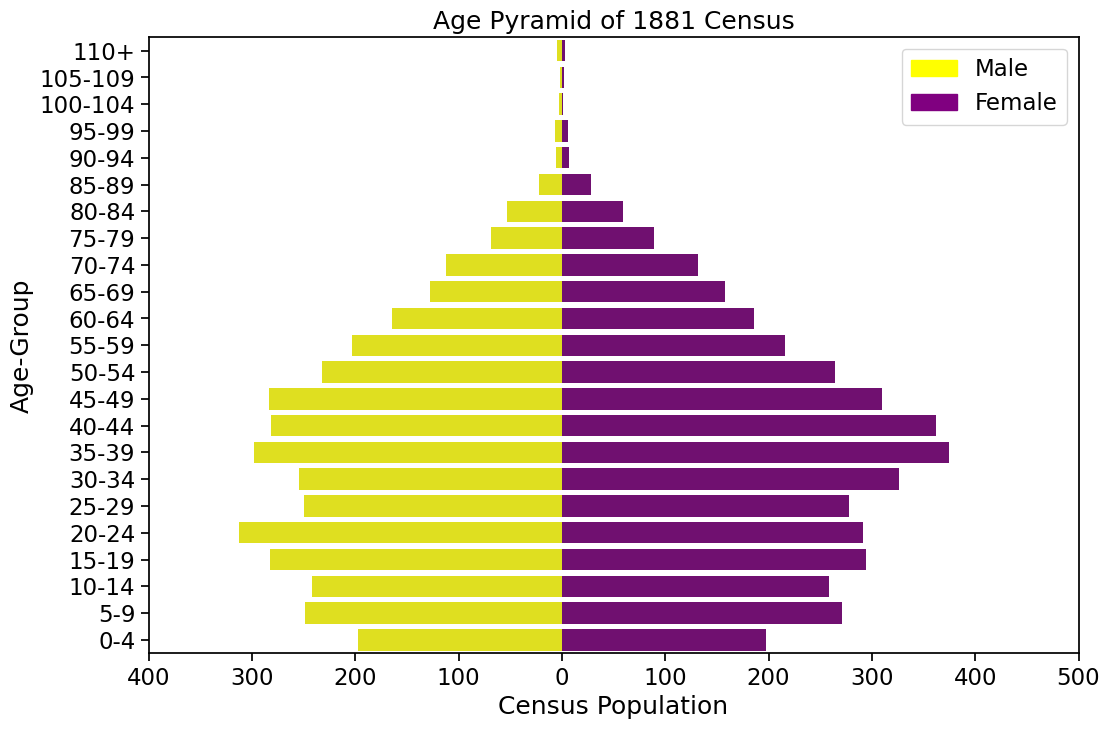

In [96]:
age_range = ['0-4','5-9','10-14','15-19','20-24','25-29', '30-34',
             '35-39','40-44','45-49','50-54','55-59',
             '60-64','65-69','70-74','75-79','80-84','85-89',
             '90-94','95-99','100-104', '105-109','110+']
m=[]
f=[]
for ar in age_range:
    start=0    
    end=0    
    if '-' in ar:
        age = ar.split('-')
        start = int(age[0])
        end = int(age[1])
    else:
        start = 100        
        end = 200
            
    m.append(-1* get_age_range(cd, 'Male', start, end))
    f.append(get_age_range(cd,'Female', start, end))
print('M:{}\nF:{}'.format(len(m), len(f)))
pdf = pd.DataFrame({'Age': age_range, 'Male': m, 'Female': f})
AgeClass = ['110+','105-109','100-104','95-99','90-94','85-89','80-84','75-79',
            '70-74','65-69','60-64','55-59','50-54','45-49',
            '40-44','35-39','30-34','25-29','20-24','15-19',
            '10-14','5-9','0-4']
plt.figure(figsize = (12,8))
bar_plot = sns.barplot(x='Male', y='Age', data=pdf, order=AgeClass, color = 'yellow')
bar_plot = sns.barplot(x='Female', y='Age', data=pdf, order=AgeClass, color = 'purple')
bar_plot.set(xlabel="Census Population", ylabel="Age-Group", title = "Age Pyramid of 1881 Census")
Male = mpatches.Patch(color = 'yellow', label = 'Male')
Female = mpatches.Patch(color = 'purple', label = 'Female')
xticks = plt.gca().get_xticks().astype(np.int64)
plt.xticks(xticks, labels = np.abs(xticks))
plt.legend(handles = [Male, Female])

plt.savefig('age_pyramid')

### Demographics of the Population

A thorough examination of the age distribution reveals that the population structure exhibits a relatively lower count of minors (dependents) below the age of 15 compared to the middle-aged group, which implies a reduced birth rate. Additionally, both males and females have a high life expectancy.  

In [97]:
#Checking for unique values in the Age Column
cd['Age'].unique()

array([ 45,  29,  18,  55,  70,  68,  35,  34,  44,  10,   9,  58,  54,
        57,  17,  51,  56,  15,  52,  12,   5,  48,  28,  24,  20,  59,
        26,  50,  43,  75,  31,   2,   0,  53,  32,  30,  62,  64,  47,
        49,  16,  22,  13,  46,  11,  27,  19,  42,  63,  78,  60,  23,
        40,   8,   6,  21,  39,  36,   7,  25,   4,   1,  38,  65,  88,
        79,  77,  41,  37,  33,  14,  66,  72,  74,   3,  61,  84,  67,
        81,  76,  86,  69,  92,  96,  73,  71,  87,  94,  83,  85,  80,
        82,  90,  91,  98, 103, 104,  89,  99,  97,  95, 102, 105,  93,
       101])

In [98]:
# define the age ranges
age_range = ['0-4','5-9','10-14','15-19','20-24','25-29', '30-34', '35-39','40-44',
             '45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89',
             '90-94','95-99','100-104', '105-109','110+']

# use pd.cut to bin the ages into age groups
cd['Age Group'] = pd.cut(cd['Age'], bins=range(0, 111, 5), labels=age_range[:-1])


In [99]:
cd

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Identifier,Age Group
0,1,Holly Road,Rita,Hanson,45,Head,Divorced,Female,Purchasing manager,No Disability,No Religion,Employed,40-44
1,2,Holly Road,Dorothy,Russell,29,Head,Single,Female,Retail merchandiser,No Disability,No Religion,Employed,25-29
2,2,Holly Road,Valerie,Hussain,18,None,Single,Female,Student,No Disability,No Religion,Student,15-19
3,2,Holly Road,Julie,Buckley,55,None,Single,Female,Hospital pharmacist,No Disability,Methodist,Employed,50-54
4,3,Holly Road,Martin,Kemp,70,Head,Married,Male,"Retired Buyer, industrial",No Disability,Methodist,Retired,65-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7756,1,Lees Longhouse,Jake,Hicks,10,Son,NA,Male,Student,No Disability,Catholic,Student,5-9
7757,1,Lees Longhouse,Neil,Richardson-Hicks,9,Son,NA,Male,Student,No Disability,Catholic,Student,5-9
7758,1,Lees Longhouse,Chelsea,Richardson-Hicks,5,Daughter,NA,Female,Student,No Disability,Catholic,Student,0-4
7759,1,Lees Longhouse,Brian,Richardson-Hicks,3,Son,NA,Male,Child,No Disability,Catholic,Child,0-4


In [100]:
# group the data by "Age Group" and "Gender" columns and count the number of entries in each group
age_gender = cd.groupby(['Age Group', 'Gender']).size().reset_index(name='counts')

# pivot the table to have "Age Group" as index and "Gender" as columns
age_gender = age_gender.pivot(index='Age Group', columns='Gender', values='counts')

# add a column for total population
age_gender['Total Population'] = age_gender['Female'] + age_gender['Male']

# Output the resulting dataframe
age_gender

Gender,Female,Male,Total Population
Age Group,,,
0-4,219,209,428
5-9,274,254,528
10-14,279,248,527
15-19,287,293,580
20-24,281,302,583
25-29,291,249,540
30-34,336,250,586
35-39,370,304,674
40-44,350,288,638


### Marital Status Plot

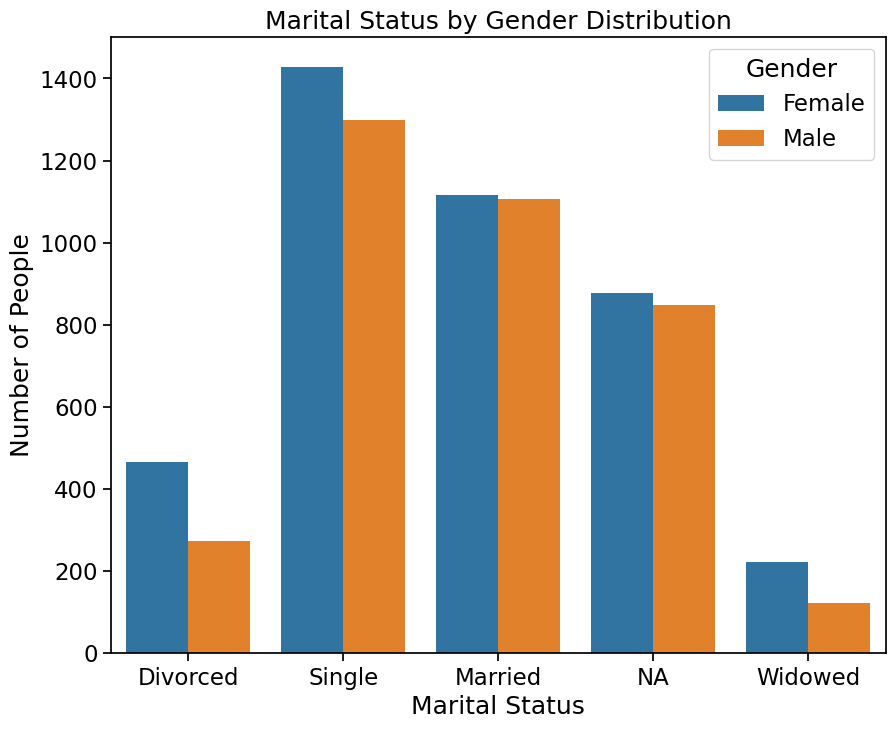

In [101]:
#Plot of Marital Status Conditioned on Gender 
fig = plt.figure(figsize=(10,8))
marital_status = sns.countplot(x="Marital Status", hue = 'Gender', data=cd)
marital_status.set_ylabel("Number of People")
plt.title("Marital Status by Gender Distribution")
plt.show() 

### Marital Status

The Marital Status column also highlights that there are more single female than male in the town, and a relatively balanced count for Married and Minors (NA). It also highlights that there are more widows than widowers in the town and this further corroborate the life expectancy age. 

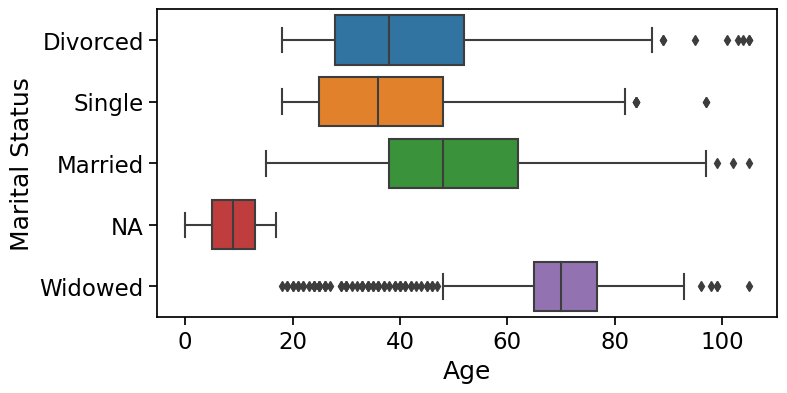

In [102]:
#Plot of Age against Marital status 
plt.figure(figsize=(8, 4))
sns.boxplot(data=cd, x="Age", y="Marital Status")
plt.savefig('marital_status_age')

### Marital Status

From the plot above, it’s observed that 35% of the total population in the town are single, followed by 29% for the Married category, 22% are Minors (NA), 10% are Divorced and the remaining 4% of the population are Widowed.  

In [103]:
#Getting the percentage of Marital Status
cd["Marital Status"].value_counts()/len(cd) * 100

Single      35.137225
Married     28.630331
NA          22.226517
Divorced     9.547739
Widowed      4.458188
Name: Marital Status, dtype: float64

 `35.1%` of the population are single

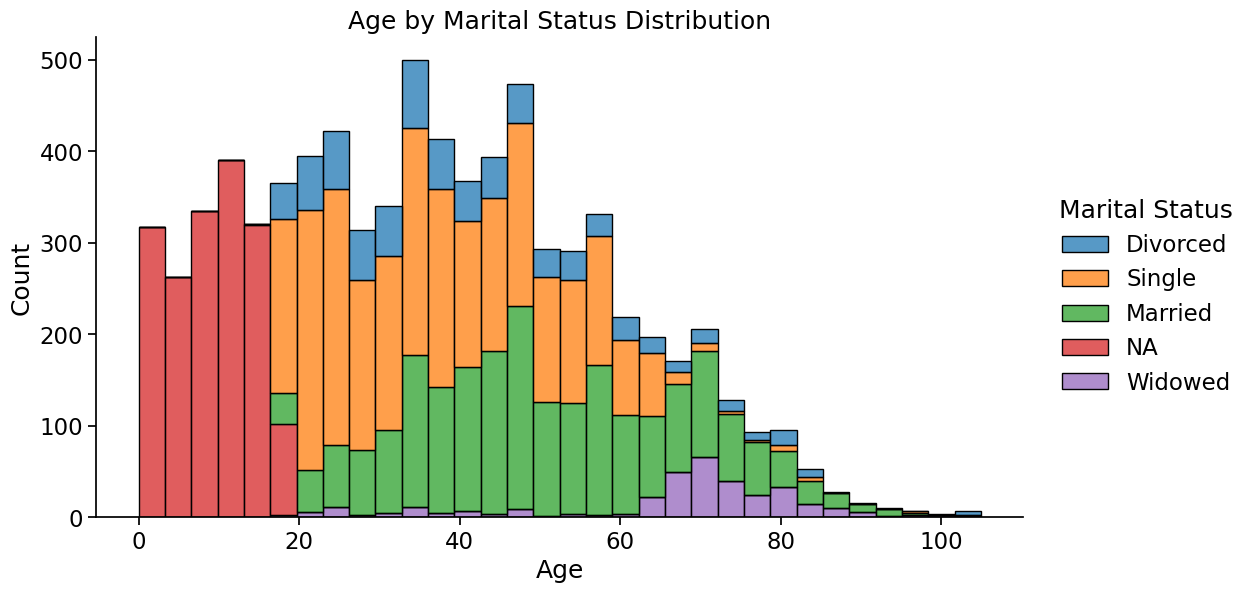

In [104]:
# Age by Marital Status Distribution
age_marital_status = sns.displot(data = cd, x='Age', hue='Marital Status', multiple='stack',height=6, aspect=1.8)
plt.title("Age by Marital Status Distribution")
plt.show()

In [105]:
#Filter Marital status to equal Divorced
divorced = cd[cd['Marital Status'] == 'Divorced']

In [106]:
#Assigning the length of divorced to a variable
divorced_count = len(divorced)

In [107]:
#Getting the length of Total Population of the Town
total_population = len(cd)
total_population

7761

In [108]:
divorced_per_thousand = (divorced_count/total_population) * 1000

print(f"There are {round(divorced_per_thousand)} per 1000 Population")

There are 95 per 1000 Population


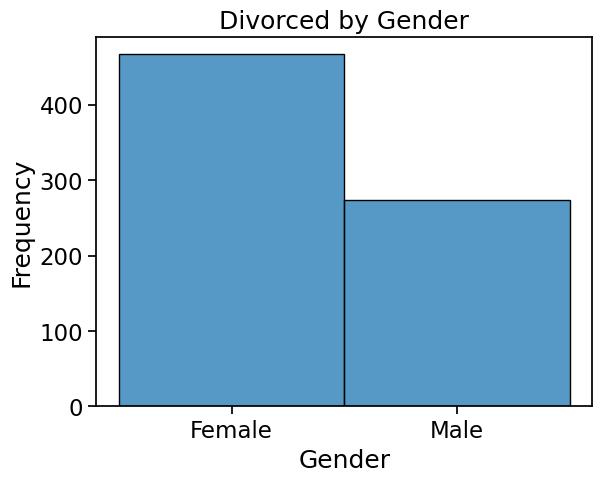

In [109]:
# Divorced by Gender Plot
sns.histplot(data=divorced, x='Gender')
# Set the axis labels
plt.title('Divorced by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [110]:
divorced

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Identifier,Age Group
0,1,Holly Road,Rita,Hanson,45,Head,Divorced,Female,Purchasing manager,No Disability,No Religion,Employed,40-44
6,3,Holly Road,Christian,Morris-Kemp,35,Son,Divorced,Male,Leisure centre manager,No Disability,Methodist,Employed,30-34
18,7,Holly Road,Marilyn,Lowe,18,Daughter,Divorced,Female,Student,No Disability,Methodist,Student,15-19
26,9,Holly Road,Rosemary,Rhodes,48,Head,Divorced,Female,"Engineer, technical sales",No Disability,Catholic,Employed,45-49
28,9,Holly Road,Jake,Rhodes,24,Son,Divorced,Male,"Civil engineer, consulting",No Disability,Catholic,Employed,20-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7726,1,Moore Barracks,Martyn,Sharp,48,Son,Divorced,Male,Museum/gallery conservator,No Disability,No Religion,Employed,45-49
7732,1,Moore Barracks,Benjamin,Sharp,30,Son,Divorced,Male,Chief Operating Officer,No Disability,No Religion,Employed,25-29
7735,1,Station Ranch,Helen,Oliver,62,Head,Divorced,Female,"Investment banker, operational",No Disability,No Religion,Employed,60-64
7738,1,Station Ranch,Stuart,Burke-Oliver,33,Son,Divorced,Male,"Administrator, charities/voluntary organisations",No Disability,No Religion,Employed,30-34


### Religion Plot

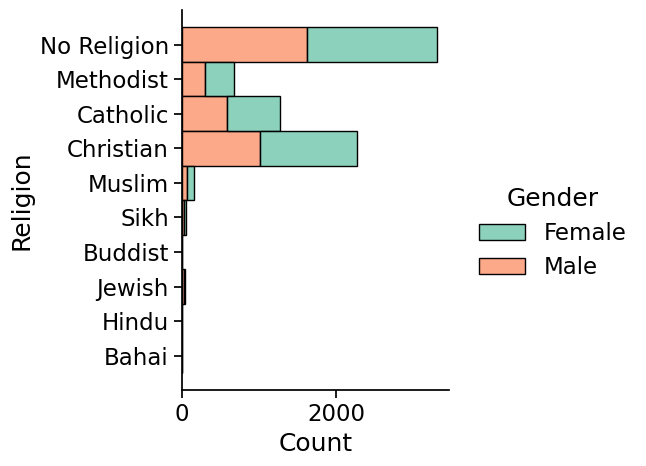

In [111]:
#Religion Plot conditioned on Gender
sns.displot(cd, y="Religion", hue = "Gender", multiple = "stack", palette = "Set2")
plt.savefig('Religion')

### Religion

From the data, there are some growing religions identified such as Muslim, Sikh and Jewish. While there were insignificant numbers for some religions such as Buddist, Hindu and Bahai. 
Christianity is the prevailing religion in the town, with Catholics, who already have a place of worship, and Methodists following closely behind. Although other religions may increase in popularity in the future, they currently lack a substantial following in the town. 

In [112]:
#Getting the count of all unique values in Religion
cd['Religion'].value_counts()

No Religion    3301
Christian      2267
Catholic       1267
Methodist       677
Muslim          153
Sikh             52
Jewish           41
Buddist           1
Hindu             1
Bahai             1
Name: Religion, dtype: int64

In [113]:
#Getting the Percentage of all Unique Values in Religion
cd["Religion"].value_counts()/len(cd) * 100

No Religion    42.533179
Christian      29.210153
Catholic       16.325216
Methodist       8.723103
Muslim          1.971395
Sikh            0.670017
Jewish          0.528282
Buddist         0.012885
Hindu           0.012885
Bahai           0.012885
Name: Religion, dtype: float64

### Infirmity Plot

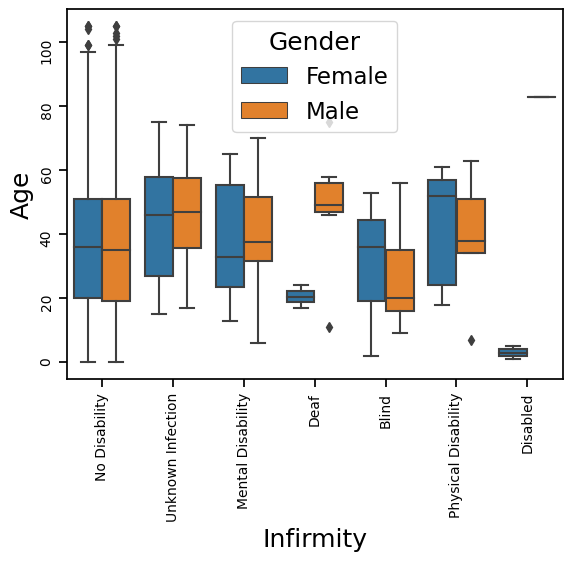

<Figure size 1000x500 with 0 Axes>

In [114]:
#Age against Infirmity conditioned on gender
d = sns.boxplot(data=cd, x="Infirmity", y="Age", hue="Gender")
d.tick_params(labelrotation = 90, labelsize = 10)
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 1.5)
plt.tight_layout()

In [115]:
#Getting the count of all unique values in Infirmity
cd['Infirmity'].value_counts()

No Disability          7705
Unknown Infection        13
Mental Disability        13
Physical Disability      10
Deaf                      9
Blind                     8
Disabled                  3
Name: Infirmity, dtype: int64

In [116]:
#Getting the Percentage of all Unique Values in Infirmity
cd["Infirmity"].value_counts()/len(cd) * 100

No Disability          99.278443
Unknown Infection       0.167504
Mental Disability       0.167504
Physical Disability     0.128849
Deaf                    0.115964
Blind                   0.103080
Disabled                0.038655
Name: Infirmity, dtype: float64

`99.3%` of the population have no disability

### Occupation Plot

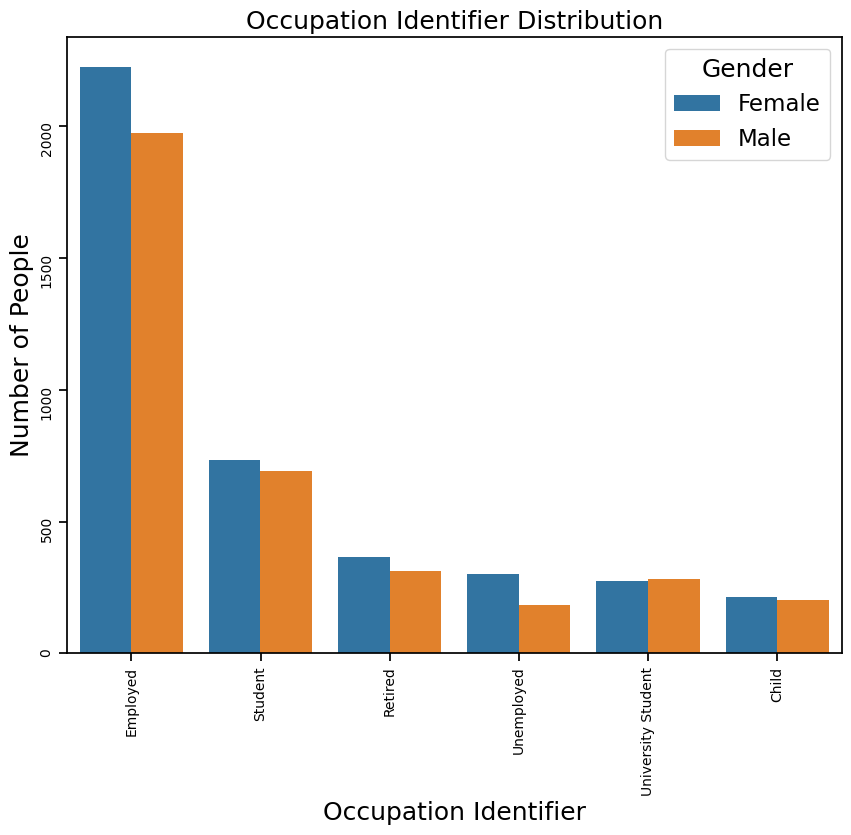

In [117]:
#Occupation Identifier Plot Conditioned on Gender
fig = plt.figure(figsize=(10,8))
occup_identifier = sns.countplot(data=cd, x="Occupation Identifier", hue='Gender')
occup_identifier.tick_params(labelrotation = 90, labelsize = 10)
occup_identifier.set_ylabel("Number of People")
plt.title("Occupation Identifier Distribution")
plt.show() 

In [118]:
# Filter the DataFrame to only include rows where Occupation is "Unemployed"
unemployed = cd[cd['Occupation Identifier'] == 'Unemployed']

In [119]:
#Getting the number of Unemployed Individuals from the Occupation Identifier Column
len(cd[cd['Occupation Identifier'] == 'Unemployed'])

484

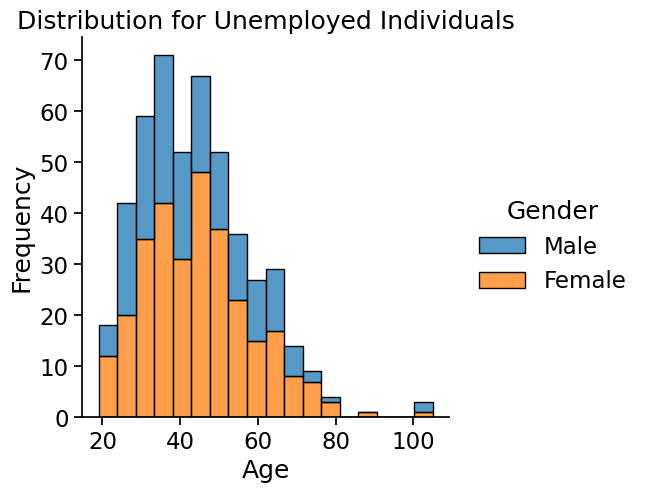

In [120]:
# Create a scatter plot of Age vs. Occupation for the "Unemployed" rows
sns.displot(data=unemployed, x='Age', hue='Gender', multiple = 'stack')
# Set the axis labels
plt.title('Distribution for Unemployed Individuals')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [121]:
#Getting the number of Retired Individuals (>66 Years)
unemployed_retired = cd[(cd['Occupation Identifier'] == 'Retired') & (cd['Age'] >= 66)]
unemployed_retired

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Identifier,Age Group
4,3,Holly Road,Martin,Kemp,70,Head,Married,Male,"Retired Buyer, industrial",No Disability,Methodist,Retired,65-69
5,3,Holly Road,Deborah,Kemp,68,Wife,Married,Female,Retired Armed forces logistics/support/adminis...,No Disability,Methodist,Retired,65-69
37,12,Holly Road,Natalie,Shepherd,75,Head,Widowed,Female,"Retired Programmer, multimedia",Unknown Infection,Muslim,Retired,70-74
76,5,Bennett Isle,Katy,Harrison,78,Head,Widowed,Female,Retired Licensed conveyancer,No Disability,Christian,Retired,75-79
121,18,Bennett Isle,Paige,Watson,88,Head,Widowed,Female,Retired Operations geologist,No Disability,Christian,Retired,85-89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7568,8,Estuaryhawk Lane,Jonathan,Robinson,76,Head,Widowed,Male,Retired Consulting civil engineer,No Disability,No Religion,Retired,75-79
7575,12,Estuaryhawk Lane,Duncan,North,70,Head,Widowed,Male,Retired Legal executive,No Disability,No Religion,Retired,65-69
7594,23,Estuaryhawk Lane,Iain,Reynolds,68,Head,Widowed,Male,Retired Fine artist,No Disability,No Religion,Retired,65-69
7715,1,Moore Barracks,Carol,Lewis,97,Head,Single,Female,Retired Soil scientist,No Disability,No Religion,Retired,95-99


In [122]:
#Assigning Retired to every individual above or equals 66years
unemployed_retired = cd.loc[(cd['Occupation Identifier'] == 'Unemployed') & (cd['Age'] >= 66), 'Occupation Identifier'] = 'Retired'
unemployed_retired

'Retired'

In [123]:
#Checking to see there are no Individuals above or equal to 66 and are Unemployed
cd[(cd['Occupation Identifier'] == 'Unemployed') & (cd['Age'] >= 66)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Identifier,Age Group


In [124]:
#Getting the count of all unique values in the Occupation Identifier Column
cd['Occupation Identifier'].value_counts()

Employed              4202
Student               1423
Retired                712
University Student     559
Unemployed             448
Child                  417
Name: Occupation Identifier, dtype: int64

In [125]:
# Filter the DataFrame to only include rows where Occupation is "Unemployed"
unemployed = cd[cd['Occupation Identifier'] == 'Unemployed']

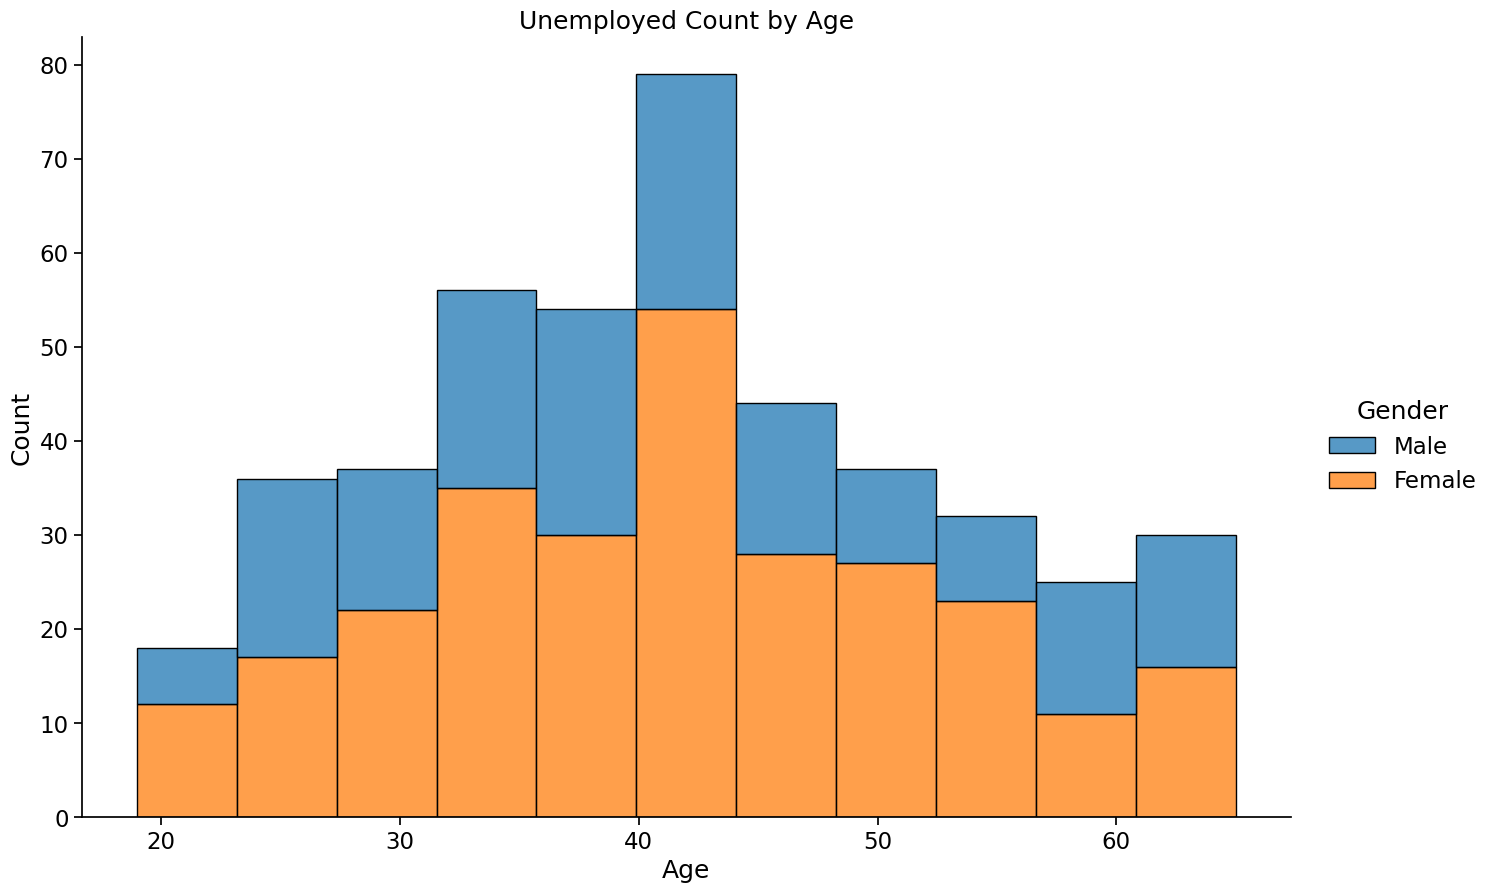

In [126]:
# Age distribution by Occupation Identifier status
age_occupation = sns.displot(data = unemployed, x='Age', hue='Gender', multiple='stack',height=9, aspect=1.5)
plt.title("Unemployed Count by Age")
plt.show()

### Unemployment Trends

In [127]:
#variable that contains values between 13 and 65
unemployed_min_age = cd[(cd['Age']>= 13) & (cd['Age'] <= 65 )]

In [128]:
count_unemployed = len(cd[(cd['Age']>= 13) & (cd['Age'] <= 65 ) & (cd['Occupation Identifier'] == 'Unemployed')])

In [129]:
#Calculating the percentage of Unemployed People in the Population
percentage_unemployed = (count_unemployed/total_population) * 100

print(f"The Percentage of Unemployed people within the Age Range of 13-65 is: {round(percentage_unemployed)}% of the Total Population")

The Percentage of Unemployed people within the Age Range of 13-65 is: 6% of the Total Population


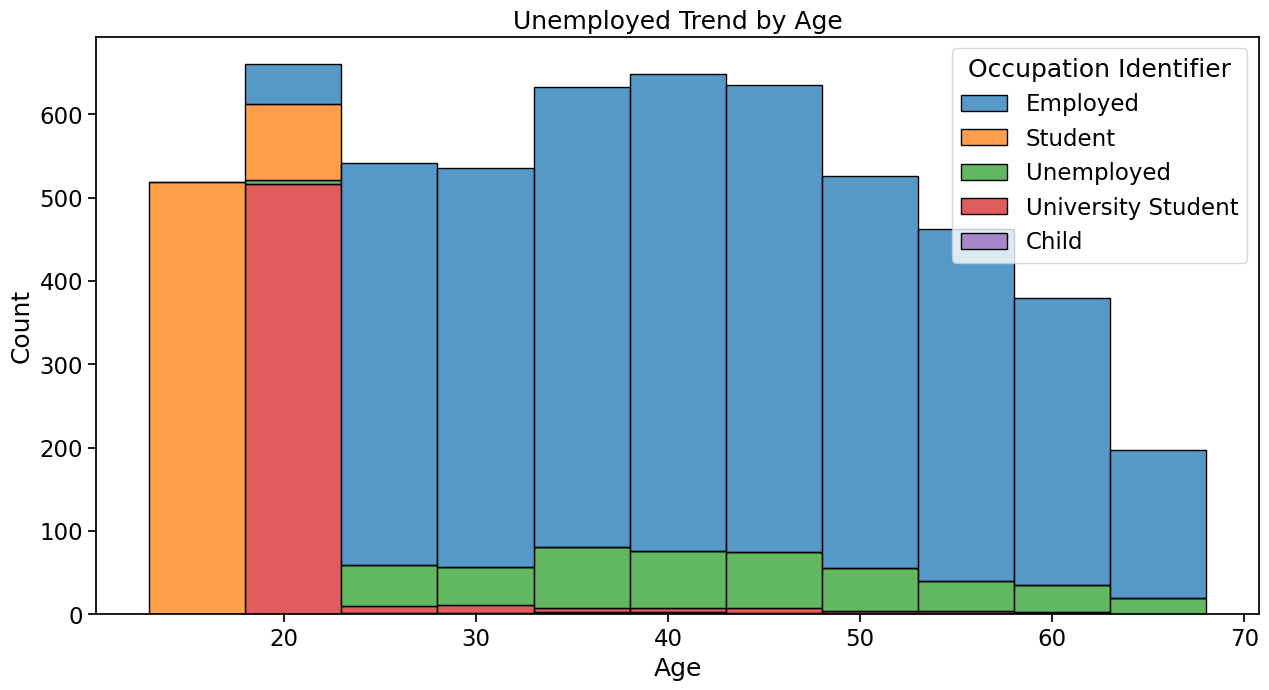

In [130]:
#Unemployment Trend by Age Plot
plot_unemployment = plt.figure(figsize=(15,7.5), dpi = 100)
unemployment_trend = sns.histplot(data = unemployed_min_age, x='Age', hue='Occupation Identifier',  multiple='stack',binwidth = 5)
plt.title("Unemployed Trend by Age")
plt.show()

### Birth and Death Rate

In [131]:
#Calculating Birth Rate for Age Zero
aged_zero = len(cd[cd['Age'] == 0])
fertility = len(cd[cd['Age'].between(26,30) & (cd['Gender'] == 'Female')])
current_age = (aged_zero/fertility) * 1000

print(f"There are {current_age:,.0f} births per 1000 of the population")

There are 186 births per 1000 of the population


In [132]:
#Calculating Birth Rate for Age Five
aged_five = len(cd[cd['Age'] == 5])
fertility_5 = len(cd[cd['Age'].between(31,35) & (cd['Gender'] == 'Female')])
previous_age = (aged_five/fertility_5) * 1000

print(f"There are {previous_age:,.0f} births per 1000 of the population")

There are 259 births per 1000 of the population


In [133]:
#Calculating the Crude Birth Rate per Thousand
birth_rate = current_age - previous_age
print(f"The birth rate per 1000 :  {birth_rate:,.0f}")

The birth rate per 1000 :  -73


There is a decline in the Birth Rate in the last `5years`

The Birth rate is reducing by `73 people per 1000` of the population annually

### Death Rate

In [134]:
#Getting the location where Age equals 105
cd.loc[cd['Age']== 105]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Identifier,Age Group
4495,33,Obelisk Lane,Marian,Little,105,Wife,Married,Female,Retired Recycling officer,No Disability,No Religion,Retired,100-104
4836,42,Taylor Cape,Hazel,Duffy,105,Head,Divorced,Female,Unemployed,No Disability,No Religion,Retired,100-104
7433,47,Lightning Squares,Graeme,Green,105,Head,Divorced,Male,Unemployed,No Disability,Christian,Retired,100-104
7475,11,Gibson Drive,Dean,Clayton,105,Head,Widowed,Male,Retired Cabin crew,No Disability,Christian,Retired,100-104


In [135]:
age_gender

Gender,Female,Male,Total Population
Age Group,,,
0-4,219,209,428
5-9,274,254,528
10-14,279,248,527
15-19,287,293,580
20-24,281,302,583
25-29,291,249,540
30-34,336,250,586
35-39,370,304,674
40-44,350,288,638


In [136]:
#Predicting death
predicted_male_death = len(cd[(cd['Age'].between(79, 105)) & (cd['Gender'] == 'Male')])
predicted_female_death = len(cd[(cd['Age'].between(83, 105)) & (cd['Gender'] == 'Female')])
print(f"The number of predicted deaths for males based on life expectancy is {predicted_male_death}")
print(f"The number of predicted deaths for females based on life expectancy is {predicted_female_death}")


The number of predicted deaths for males based on life expectancy is 104
The number of predicted deaths for females based on life expectancy is 66


In [137]:
#Calculating Crude Death rate
male_death_rate = (predicted_male_death/total_population) * 1000
female_death_rate = (predicted_female_death/total_population) * 1000
total_death_rate = male_death_rate + female_death_rate

print(f"The number of deaths for males per thousand population in the town is {round(male_death_rate)}")
print(f"The number of deaths for females per thousand population in the town is {round(female_death_rate)}")
print(f"The total number of deaths per thousand population in the town is {round(total_death_rate)}")

The number of deaths for males per thousand population in the town is 13
The number of deaths for females per thousand population in the town is 9
The total number of deaths per thousand population in the town is 22


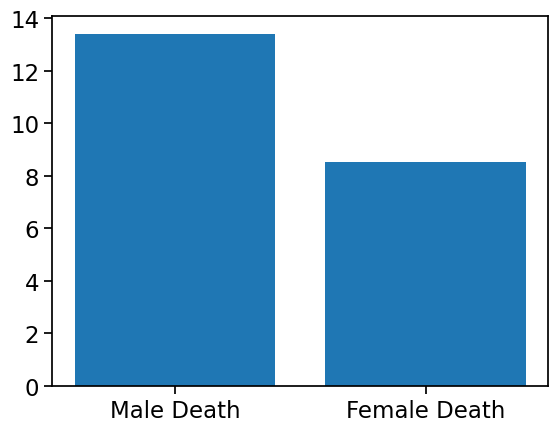

In [138]:
#Death Rate by Gender Plot
plt.bar(['Male Death', 'Female Death'],[male_death_rate, female_death_rate])
plt.show()


#### Occupancy Count

In [139]:
#Calculating Occupany Count
occupancy_count = cd[~cd["Relationship to Head of House"].isin(['Visitor', 'Lodger'])]
cd['Occupancy Count'] = occupancy_count.groupby(['House Number', 'Street'])['House Number'].transform('count')
cd['Occupancy Count'] = cd['Occupancy Count'].fillna(0)
cd['Occupancy Count']= cd['Occupancy Count'].astype(int)

cd.head(30)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Identifier,Age Group,Occupancy Count
0,1,Holly Road,Rita,Hanson,45,Head,Divorced,Female,Purchasing manager,No Disability,No Religion,Employed,40-44,1
1,2,Holly Road,Dorothy,Russell,29,Head,Single,Female,Retail merchandiser,No Disability,No Religion,Employed,25-29,3
2,2,Holly Road,Valerie,Hussain,18,None,Single,Female,Student,No Disability,No Religion,Student,15-19,3
3,2,Holly Road,Julie,Buckley,55,None,Single,Female,Hospital pharmacist,No Disability,Methodist,Employed,50-54,3
4,3,Holly Road,Martin,Kemp,70,Head,Married,Male,"Retired Buyer, industrial",No Disability,Methodist,Retired,65-69,4
5,3,Holly Road,Deborah,Kemp,68,Wife,Married,Female,Retired Armed forces logistics/support/adminis...,No Disability,Methodist,Retired,65-69,4
6,3,Holly Road,Christian,Morris-Kemp,35,Son,Divorced,Male,Leisure centre manager,No Disability,Methodist,Employed,30-34,4
7,3,Holly Road,Lauren,Morris-Kemp,34,Daughter,Single,Female,Therapeutic radiographer,No Disability,Methodist,Employed,30-34,4
8,4,Holly Road,Valerie,Wilson,44,Head,Married,Female,Animator,No Disability,Catholic,Employed,40-44,4
9,4,Holly Road,Daniel,Wilson,45,Husband,Married,Male,"Engineer, land",No Disability,Catholic,Employed,40-44,4


In [140]:
#Getting Unique Values of Occupancy Count
cd['Occupancy Count'].unique()

array([ 1,  3,  4,  6,  5,  2,  0,  7, 10, 11,  8,  9, 12, 19, 14, 15, 20])

In [141]:
cd.head(50)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Identifier,Age Group,Occupancy Count
0,1,Holly Road,Rita,Hanson,45,Head,Divorced,Female,Purchasing manager,No Disability,No Religion,Employed,40-44,1
1,2,Holly Road,Dorothy,Russell,29,Head,Single,Female,Retail merchandiser,No Disability,No Religion,Employed,25-29,3
2,2,Holly Road,Valerie,Hussain,18,None,Single,Female,Student,No Disability,No Religion,Student,15-19,3
3,2,Holly Road,Julie,Buckley,55,None,Single,Female,Hospital pharmacist,No Disability,Methodist,Employed,50-54,3
4,3,Holly Road,Martin,Kemp,70,Head,Married,Male,"Retired Buyer, industrial",No Disability,Methodist,Retired,65-69,4
5,3,Holly Road,Deborah,Kemp,68,Wife,Married,Female,Retired Armed forces logistics/support/adminis...,No Disability,Methodist,Retired,65-69,4
6,3,Holly Road,Christian,Morris-Kemp,35,Son,Divorced,Male,Leisure centre manager,No Disability,Methodist,Employed,30-34,4
7,3,Holly Road,Lauren,Morris-Kemp,34,Daughter,Single,Female,Therapeutic radiographer,No Disability,Methodist,Employed,30-34,4
8,4,Holly Road,Valerie,Wilson,44,Head,Married,Female,Animator,No Disability,Catholic,Employed,40-44,4
9,4,Holly Road,Daniel,Wilson,45,Husband,Married,Male,"Engineer, land",No Disability,Catholic,Employed,40-44,4


In [142]:
#Calculating median for Occupancy Count
cd['Occupancy Count'].median()

3.0

In [143]:
#Getting the length for Occupancy Count
len(cd['Occupancy Count'])

7761

In [144]:
#Getting the length for Occupancy Count greater than 3
len(cd[cd['Occupancy Count'] > 3])

3275

In [145]:
#Getting the length for Lodgers in the Relationship to Head of House Column
len(cd.loc[cd['Relationship to Head of House'] == 'Lodger'])

247

In [146]:
#Getting the length for Visitors in the Relationship to Head of House Column
len(cd.loc[cd['Relationship to Head of House'] == 'Visitor'])

13

In [147]:
#Getting the location for Lodgers in the Relationship to Head of House Column
cd.loc[cd['Relationship to Head of House'] == 'Lodger']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Identifier,Age Group,Occupancy Count
43,13,Holly Road,Leigh,King,53,Lodger,Divorced,Male,Local government officer,No Disability,Christian,Employed,50-54,0
79,6,Bennett Isle,Eleanor,Nash,60,Lodger,Divorced,Female,"Administrator, education",No Disability,Christian,Employed,55-59,0
80,6,Bennett Isle,Helen,Patel,47,Lodger,Divorced,Female,Social researcher,No Disability,No Religion,Employed,45-49,0
81,6,Bennett Isle,Anna,Curtis,34,Lodger,Divorced,Female,Animator,No Disability,Catholic,Employed,30-34,0
115,15,Bennett Isle,Jessica,Gould,38,Lodger,Single,Female,Curator,No Disability,Christian,Employed,35-39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7708,1,Roman Stronghold,Claire,Blake,59,Lodger,Divorced,Female,Minerals surveyor,No Disability,Christian,Employed,55-59,0
7709,1,Roman Stronghold,Lynne,Freeman,33,Lodger,Single,Female,"Engineer, drilling",No Disability,Methodist,Employed,30-34,0
7710,1,Roman Stronghold,Kirsty,Hawkins,31,Lodger,Divorced,Female,Unemployed,No Disability,Methodist,Unemployed,30-34,0
7712,1,Roman Stronghold,Diana,Kemp,56,Lodger,Divorced,Female,Records manager,No Disability,Catholic,Employed,55-59,0


In [148]:
#Fetching for where Occupancy Count equals 20
cd[cd['Occupancy Count'] == 20]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Identifier,Age Group,Occupancy Count
7715,1,Moore Barracks,Carol,Lewis,97,Head,Single,Female,Retired Soil scientist,No Disability,No Religion,Retired,95-99,20
7716,1,Moore Barracks,Luke,Jackson,97,Partner,Single,Male,Retired Software engineer,No Disability,No Religion,Retired,95-99,20
7717,1,Moore Barracks,Megan,Sharp,67,Daughter,Single,Female,Lobbyist,No Disability,No Religion,Employed,65-69,20
7718,1,Moore Barracks,Ruth,Sharp,65,Daughter,Single,Female,"Engineer, aeronautical",No Disability,No Religion,Employed,60-64,20
7719,1,Moore Barracks,Dawn,Sharp,62,Daughter,Single,Female,"Accountant, chartered",No Disability,No Religion,Employed,60-64,20
7720,1,Moore Barracks,Anne,Sharp,60,Daughter,Single,Female,Copy,No Disability,No Religion,Employed,55-59,20
7721,1,Moore Barracks,Stephanie,Sharp,57,Daughter,Single,Female,"Scientist, audiological",No Disability,No Religion,Employed,55-59,20
7722,1,Moore Barracks,Kate,Sharp,55,Daughter,Widowed,Female,Podiatrist,No Disability,No Religion,Employed,50-54,20
7723,1,Moore Barracks,Chloe,Sharp,55,Daughter,Single,Female,"Embryologist, clinical",No Disability,No Religion,Employed,50-54,20
7724,1,Moore Barracks,Irene,Sharp,51,Daughter,Single,Female,Therapeutic radiographer,No Disability,No Religion,Employed,50-54,20


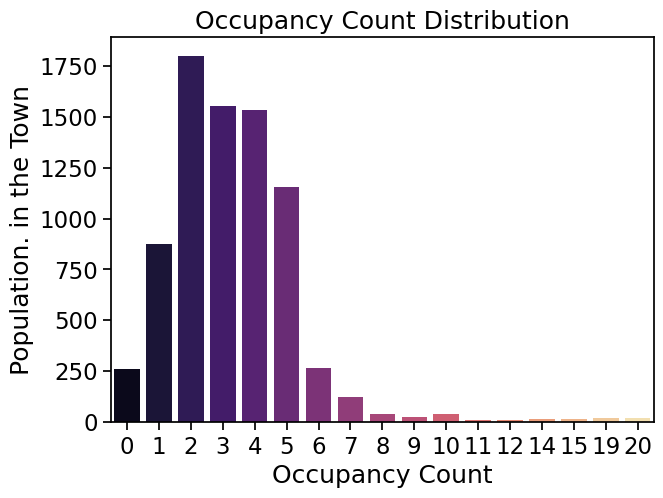

In [149]:
#Occupancy Count Plot
fig = plt.figure(figsize=(7,5))
marital_status = sns.countplot(x="Occupancy Count", data=cd, palette ='magma')
marital_status.set_ylabel("Population. in the Town")
plt.title("Occupancy Count Distribution")
plt.savefig('occupancy_count')
plt.show() 

#### Commuters

In [150]:
#Calculating Commuters
commuters = cd[(cd['Occupation'].str.lower().str.contains('university|lecturer|phd|academic librarian|research|professor|teaching laboratory technician')) 
               & (cd['Occupation Identifier'] != 'Retired')]

#Getting the length of commuters
commuters_count = len(commuters)

#Getting the Percentage of Commuters
percentage_of_commuters = (commuters_count/total_population) * 100

print(f"The Percentage of Commuters in the Town is {percentage_of_commuters:.1f}%")

The Percentage of Commuters in the Town is 9.2%


In [151]:
commuters_count

716

In [152]:
#Getting Non-commuters count
non_commuters_count = total_population - commuters_count

print(f"The Total Number of Non-Commuters in the Town is {non_commuters_count}")

The Total Number of Non-Commuters in the Town is 7045


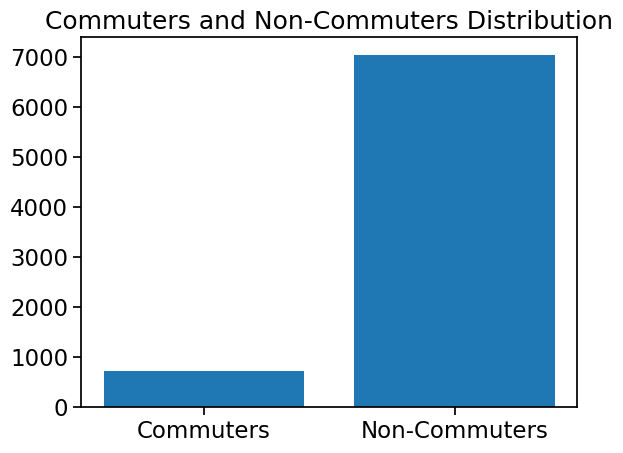

In [153]:
#Commuters and Non-Commuters Plot
plt.bar(['Commuters', 'Non-Commuters'],[commuters_count, non_commuters_count])
plt.title("Commuters and Non-Commuters Distribution")
plt.savefig('commuters_plot')
plt.show()


#### Migration Rate

In [154]:
#Calculating Immigration Rate
immigration = cd[(cd["Relationship to Head of House"].isin(['Lodger', 'Visitor', 'None']))]
migration_count = len(immigration)

percentage_of_immigrants = (migration_count/total_population) * 100

print(f"The Percentage of Immigrants in the Town is {percentage_of_immigrants:.1f}%")

The Percentage of Immigrants in the Town is 9.7%


In [155]:
migration_count

755

#### Emigration Rate

In [156]:
#Calculating Divorce Rate for Gender
male_divorcee = len(cd[(cd['Marital Status'] == 'Divorced') & (cd['Gender'] == 'Male')])
female_divorcee = len(cd[(cd['Marital Status'] == 'Divorced') & (cd['Gender'] == 'Female')])

print(f"There are {male_divorcee} number of Male Divorcees in the Town")
print(f"There are {female_divorcee} number of Female Divorcees in the Town")

There are 274 number of Male Divorcees in the Town
There are 467 number of Female Divorcees in the Town


In [157]:
#Calculating Total Emigrants
total_emigrants = female_divorcee - male_divorcee 
percantage_of_emigrants = (total_emigrants/total_population) * 100
print(f"The Total Number of Emigrants in the Town is {total_emigrants}")
print(f"The Percentage of Emigrants in the Town is {round(percantage_of_emigrants)}%")

The Total Number of Emigrants in the Town is 193
The Percentage of Emigrants in the Town is 2%


In [158]:
#Getting Information about the Dataframe
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7761 entries, 0 to 7760
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   House Number                   7761 non-null   int64   
 1   Street                         7761 non-null   object  
 2   First Name                     7761 non-null   object  
 3   Surname                        7761 non-null   object  
 4   Age                            7761 non-null   int32   
 5   Relationship to Head of House  7761 non-null   object  
 6   Marital Status                 7761 non-null   object  
 7   Gender                         7761 non-null   object  
 8   Occupation                     7761 non-null   object  
 9   Infirmity                      7761 non-null   object  
 10  Religion                       7761 non-null   object  
 11  Occupation Identifier          7761 non-null   object  
 12  Age Group                      770

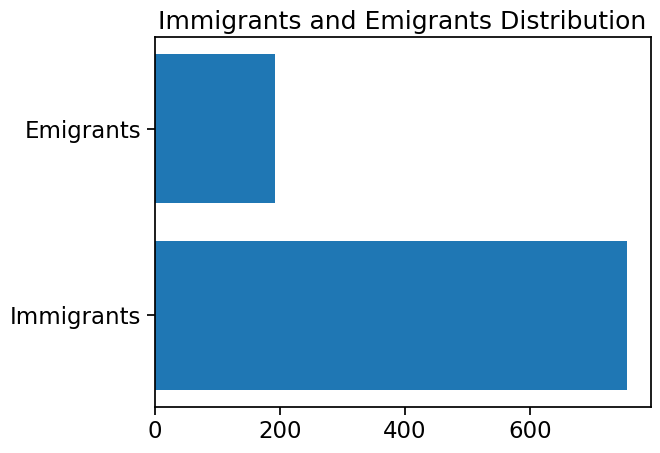

In [159]:
#Migration Plot
plt.barh(['Immigrants', 'Emigrants'],[migration_count, total_emigrants])
plt.title("Immigrants and Emigrants Distribution")
plt.savefig('migrants_plot')
plt.show()

### Migration Rate 
 
Immigration statistics were calculated from Relationship to the Head of House values which are ‘Lodgers’, ‘Visitors’ and ‘None’. The Percentage of Immigrants in the Town based on these statistics is 10%. 
Emigration statistics were calculated from the difference in male and female divorcees. The percentage of emigrants from the Town based on these statistics is 2% which is significantly low, this implies the Town’s population remains. 


### Address

In [160]:
#Concatenating House Number and Street
cd["Address"] = cd["House Number"].astype(str) + " " + cd["Street"]
house_count = cd["Address"].value_counts()
house_count.value_counts()

1     863
2     859
3     495
4     407
5     266
6      53
7      18
10      6
8       4
9       4
11      4
18      2
20      1
12      1
13      1
19      1
21      1
Name: Address, dtype: int64

In [161]:
#Calculating Median for House Count Column
house_count.median()

2.0

In [162]:
#Getting the length of House Count Column
len(house_count)

2986

In [163]:
cd

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Identifier,Age Group,Occupancy Count,Address
0,1,Holly Road,Rita,Hanson,45,Head,Divorced,Female,Purchasing manager,No Disability,No Religion,Employed,40-44,1,1 Holly Road
1,2,Holly Road,Dorothy,Russell,29,Head,Single,Female,Retail merchandiser,No Disability,No Religion,Employed,25-29,3,2 Holly Road
2,2,Holly Road,Valerie,Hussain,18,None,Single,Female,Student,No Disability,No Religion,Student,15-19,3,2 Holly Road
3,2,Holly Road,Julie,Buckley,55,None,Single,Female,Hospital pharmacist,No Disability,Methodist,Employed,50-54,3,2 Holly Road
4,3,Holly Road,Martin,Kemp,70,Head,Married,Male,"Retired Buyer, industrial",No Disability,Methodist,Retired,65-69,4,3 Holly Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7756,1,Lees Longhouse,Jake,Hicks,10,Son,NA,Male,Student,No Disability,Catholic,Student,5-9,7,1 Lees Longhouse
7757,1,Lees Longhouse,Neil,Richardson-Hicks,9,Son,NA,Male,Student,No Disability,Catholic,Student,5-9,7,1 Lees Longhouse
7758,1,Lees Longhouse,Chelsea,Richardson-Hicks,5,Daughter,NA,Female,Student,No Disability,Catholic,Student,0-4,7,1 Lees Longhouse
7759,1,Lees Longhouse,Brian,Richardson-Hicks,3,Son,NA,Male,Child,No Disability,Catholic,Child,0-4,7,1 Lees Longhouse
